## Pattern Generation and Trace for IC NTE74HC161 TTL, Synchronous 4-Bit Counter
This notebook shows and example of generating patterns and tracing the outputs for an off-the-shelf IC using PYNQ DI overlay.  
The input stimulus is provided and output respose is captured in the notebook using the WaveJson format.  
The Pattern is generated at 10Mhz. We are applying a 112 vectors in a single shot

#### References
http://datasheet.octopart.com/NTE74HC163-NTE-Electronics-datasheet-22129263.pdf

## Step 1: Overlay Management
Users have to import all the necessary classes. Make sure to use the right bitstream.

In [1]:
from pynq import Overlay

Overlay('interface.bit').download()

fsm_spec = {'inputs': [('not_start','D14'),('Q','D15'),
                       ('E','D16')],
        'outputs': [('Clear','D0'), ('Clk','D1'), ('A','D2'), ('B','D3'), 
                    ('C','D4'), ('D','D5'), ('Enable_P','D8'), ('Load','D7'),
                    ('Enable_T','D6')],
        'states': ['S0', 'S1', 'S2'],
        'transitions': [['0--', 'S0', 'S0', '000000000'],
                        ['1--', 'S0', 'S1', '000000000'],
                        ['1--', 'S1', 'S2', '000000000'],
                        ['0--', 'S1', 'S0', '000000000'],
                        ['1--', 'S2', 'S1', '110000111'],
                        ['0--', 'S2', 'S0', '110000111'],
                        ['0--', '*',  'S0', '']]}
            

In [2]:
from pynq.intf import ARDUINO
from pynq.intf import FSMGenerator

fsm = FSMGenerator(ARDUINO, fsm_spec, use_analyzer=True)

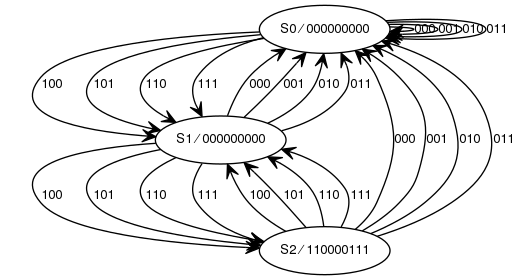

In [3]:
fsm.display()

In [4]:
fsm.start(num_samples=40, frequency_mhz=10)
fsm.waveform.display()

In [5]:
fsm.data_samples

array([4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067, 4609434235793571840, 4609434236266480067,
       4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067, 4609434235793571840, 4609434236266480067,
       4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067, 4609434235793571840, 4609434236266480067,
       4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067, 4609434235793571840, 4609434236266480067,
       4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067, 4609434235793571840, 4609434236266480067,
       4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067, 4609434235793571840, 4609434236266480067,
       4609434235793571840, 4609434236266480067, 4609434235793571840,
       4609434236266480067], dtype=uint64)

In [6]:
fsm.transitions

[['000', 'S0', 'S0', '000000000'],
 ['001', 'S0', 'S0', '000000000'],
 ['010', 'S0', 'S0', '000000000'],
 ['011', 'S0', 'S0', '000000000'],
 ['100', 'S0', 'S1', '000000000'],
 ['101', 'S0', 'S1', '000000000'],
 ['110', 'S0', 'S1', '000000000'],
 ['111', 'S0', 'S1', '000000000'],
 ['100', 'S1', 'S2', '000000000'],
 ['101', 'S1', 'S2', '000000000'],
 ['110', 'S1', 'S2', '000000000'],
 ['111', 'S1', 'S2', '000000000'],
 ['000', 'S1', 'S0', '000000000'],
 ['001', 'S1', 'S0', '000000000'],
 ['010', 'S1', 'S0', '000000000'],
 ['011', 'S1', 'S0', '000000000'],
 ['100', 'S2', 'S1', '110000111'],
 ['101', 'S2', 'S1', '110000111'],
 ['110', 'S2', 'S1', '110000111'],
 ['111', 'S2', 'S1', '110000111'],
 ['000', 'S2', 'S0', '110000111'],
 ['001', 'S2', 'S0', '110000111'],
 ['010', 'S2', 'S0', '110000111'],
 ['011', 'S2', 'S0', '110000111']]